In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
dr = pd.read_csv("archive/Expanded_data_with_more_features.csv")

In [20]:
df = pd.DataFrame(dr)

In [21]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [22]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [25]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop Unnamed Column

In [28]:
df = df.drop("Unnamed: 0", axis = 1)

In [29]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Change weekly study hours column

In [30]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct", "5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Gender Distribution

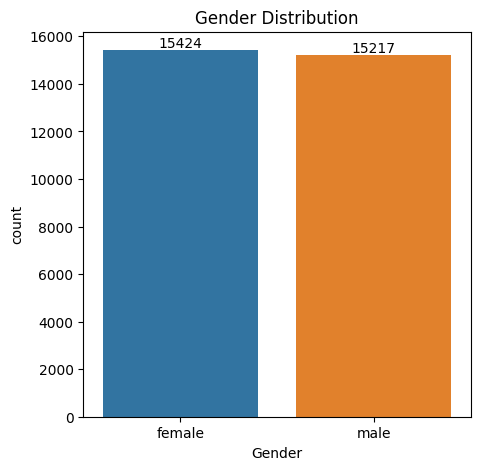

In [44]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

# Analysis = no. of female > no. of male

In [36]:
gb = df.groupby("ParentEduc").agg({"WritingScore": "mean", "MathScore": "mean", "ReadingScore": "mean"})

In [37]:
gb

,WritingScore,MathScore,ReadingScore
ParentEduc,,,
associate's degree,70.299099,68.365586,71.124324
bachelor's degree,73.331069,70.466627,73.062020
high school,65.421136,64.435731,67.213997
master's degree,76.356896,72.336134,75.832921
some college,68.501432,66.390472,69.179708
some high school,63.632409,62.584013,65.510785


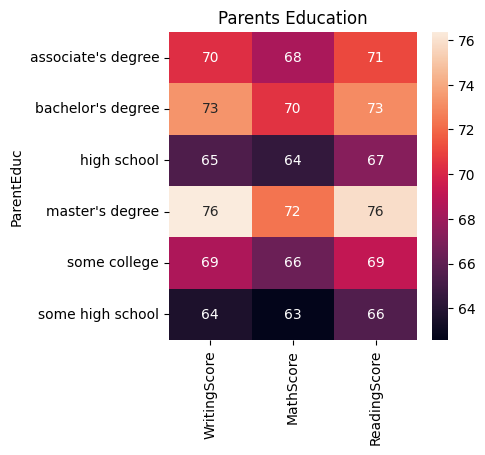

In [45]:
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True)
plt.title("Parents Education")
plt.show()

# we can conclude that parents education has great impact on students performance

In [41]:
gb2 = df.groupby("ParentMaritalStatus").agg({"WritingScore": "mean", "MathScore": "mean", "ReadingScore": "mean"})


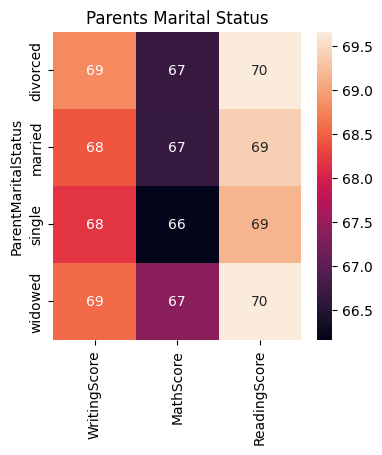

In [46]:
plt.figure(figsize = (4,4))
sns.heatmap(gb2, annot = True)
plt.title("Parents Marital Status")
plt.show()

# Marital status has negligible impact

In [50]:
gb3 = df.groupby("PracticeSport").agg({"WritingScore": "mean", "MathScore": "mean", "ReadingScore": "mean"})

In [51]:
gb3

,WritingScore,MathScore,ReadingScore
PracticeSport,,,
never,66.522727,64.171079,68.337662
regularly,69.604003,67.839155,69.943019
sometimes,68.072438,66.274831,69.241307


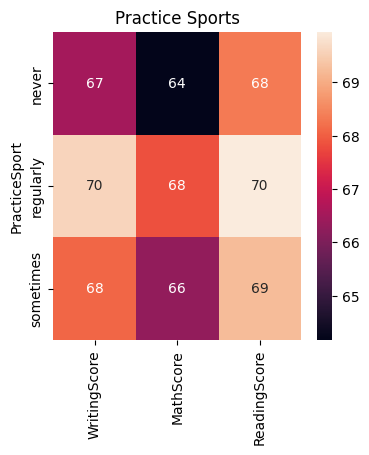

In [52]:
plt.figure(figsize = (4,4))
sns.heatmap(gb3, annot = True)
plt.title("Practice Sports")
plt.show()

# Practice Sports has negligible impact

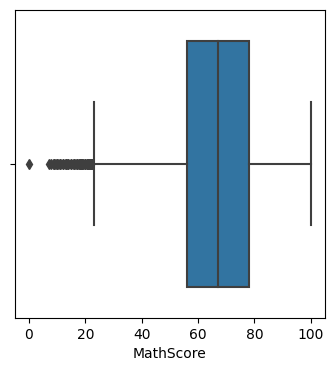

In [57]:
plt.figure(figsize = (4,4))
sns.boxplot(data = df, x = "MathScore")
plt.show()

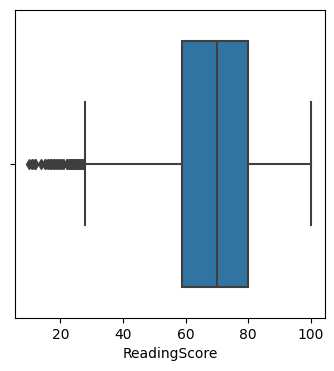

In [58]:
plt.figure(figsize = (4,4))
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

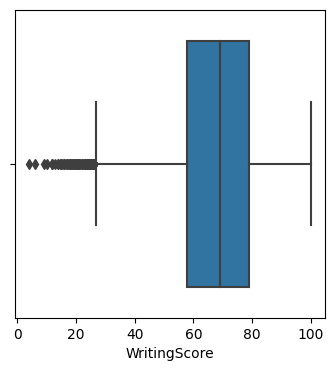

In [59]:
plt.figure(figsize = (4,4))
sns.boxplot(data = df, x = "WritingScore")
plt.show()

In [61]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


## Distribution of Ethnic Groups

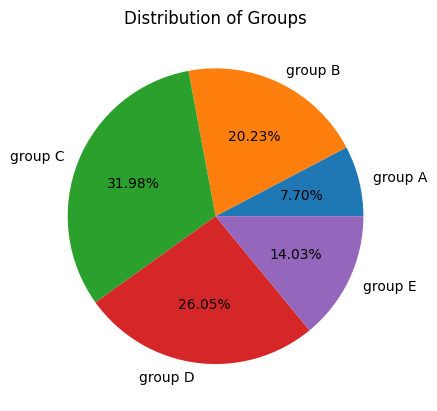

In [69]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["group A", "group B", "group C", "group D", "group E"]

mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Groups")
plt.show()